In [35]:
# Question number 01-A
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dataset = pd.read_csv("iris.data", names=names).drop(0, axis=0).reset_index(drop=True)
print(dataset.head())
dataset.drop('petal-width', axis=1, inplace=True)
print(dataset.head())
array = dataset.values
X = array[:, 0:3]
Y = array[:, 3]
kf = KFold(n_splits=5, shuffle=True)
max_sc = 0
for k in range(1,11):
    kf = KFold(n_splits=5, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, scoring='accuracy', cv=kf, n_jobs=-1)
    print(k, val, scores)
    if max_sc <= np.mean(scores):
        max_sc = np.mean(scores)
        max_k = k
    
print("Highes Accuracy = ", max_sc, " at  k = ", max_k)

   sepal-length  sepal-width  petal-length  petal-width      species
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa
   sepal-length  sepal-width  petal-length      species
0           4.9          3.0           1.4  Iris-setosa
1           4.7          3.2           1.3  Iris-setosa
2           4.6          3.1           1.5  Iris-setosa
3           5.0          3.6           1.4  Iris-setosa
4           5.4          3.9           1.7  Iris-setosa
1 [] [0.9        0.86666667 0.9        0.96666667 0.96551724]
2 [] [0.93333333 0.9        0.96666667 0.93333333 0.82758621]
3 [] [0.86666667 1.         0.93333333 0.93333333 0.86206897]
4 [] [0.93333333 0.9        0.96666667 0.86666667 1.        ]
5 

In [ ]:
!pip install --upgrade --user nbconvert

In [41]:
# Question number 01-B
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score


names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dataset = pd.read_csv("iris.data", names=names).drop(0, axis=0).reset_index(drop=True)
print(dataset.head())
dataset.drop('petal-width', axis=1, inplace=True)
print(dataset.head())
array = dataset.values
X = array[:, 0:3]
Y = array[:, 3]
kf = KFold(n_splits=5, shuffle=True)

dt = DecisionTreeClassifier( criterion='entropy', ccp_alpha = 0.015)
scores = cross_val_score(dt, X, Y, scoring='accuracy', cv=kf, n_jobs=-1)
print("Accurcay : ", np.mean(scores))

   sepal-length  sepal-width  petal-length  petal-width      species
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa
   sepal-length  sepal-width  petal-length      species
0           4.9          3.0           1.4  Iris-setosa
1           4.7          3.2           1.3  Iris-setosa
2           4.6          3.1           1.5  Iris-setosa
3           5.0          3.6           1.4  Iris-setosa
4           5.4          3.9           1.7  Iris-setosa
Accurcay :  0.9197701149425287


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       89             66             23       94  28.1   
1            0      137             40             35      168  43.1   
2            3       78             50             32       88  31.0   
3            2      197             70             45      543  30.5   
4            1      189             60             23      846  30.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.167   21        0  
1                     2.288   33        1  
2                     0.248   26        1  
3                     0.158   53        1  
4                     0.398   59        1  
   Pregnancies  Glucose  BloodPressure  Insulin   BMI  Outcome
0            1       89             66       94  28.1        0
1            0      137             40      168  43.1        1
2            3       78             50       88  31.0        1
3            2      197             70      543  30

C:\Users\Saman Khan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


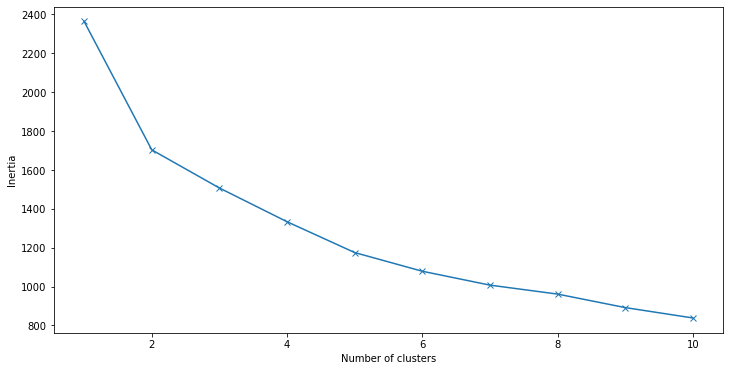

DecisionTreeClassifier(ccp_alpha=0.015, criterion='entropy')


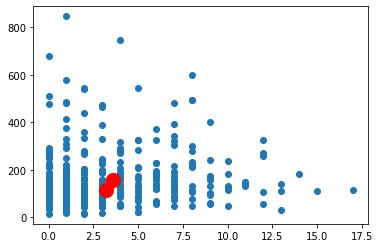

In [59]:
# Question number 02-A
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


data=pd.read_csv("diabetes.csv")
print(data.head())
data.drop(['SkinThickness', 'DiabetesPedigreeFunction', 'Age'], axis=1, inplace=True)
print(data.head())
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# fitting multiple k-means algorithms and storing the values in an empty list
iner = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    iner.append(kmeans.inertia_)


frame = pd.DataFrame({'Cluster':range(1,11), 'Inertia':iner})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['Inertia'], marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters = 2, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
print(dt)

X = np.array(data.loc[:,['Pregnancies',                # Choose your variable names
                       'Glucose','BloodPressure','Insulin', 'BMI']])    
kmeans = KMeans(n_clusters = 2, init='k-means++')
pred_y = kmeans.fit_predict(X)



plt.scatter(X[:,0], 
            X[:,3])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()